In [2]:
import argparse
import os
import time
import base64
from matplotlib import pyplot as plt

import cv2
from nms import nms
import numpy as np

import pytesseract

In [3]:
image = cv2.imread(r'test.jpg', cv2.IMREAD_COLOR)
orig = image.copy()
(origHeight, origWidth) = image.shape[:2]
# set the new width and height and then determine the ratio in change
# for both the width and height
(newW, newH) = (320, 320)
ratioWidth = origWidth / float(newW)
ratioHeight = origHeight / float(newH)

# resize the image and grab the new image dimensions
image = cv2.resize(image, (newW, newH))
(imageHeight, imageWidth) = image.shape[:2]
image1 = cv2.imread(r'2aadhaarcrop.jpg', cv2.IMREAD_COLOR)
orig1 = image.copy()
(origHeight, origWidth) = image1.shape[:2]
# set the new width and height and then determine the ratio in change
# for both the width and height
(newW, newH) = (320, 320)
ratioWidth = origWidth / float(newW)
ratioHeight = origHeight / float(newH)

# resize the image and grab the new image dimensions
image1 = cv2.resize(image1, (newW, newH))
(imageHeight, imageWidth) = image1.shape[:2]

In [4]:
image = cv2.imread(r'img/s1.png')
config = ("--psm 11 -c tessedit_char_whitelist=0123456789/")
data1 = pytesseract.image_to_data(image, output_type=pytesseract.Output.DATAFRAME, config=config)
data1.dropna()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,483,108,84,35,39,WA
5,5,1,1,1,1,2,586,116,109,35,0,{IHTT
9,5,1,2,1,1,1,1055,116,67,20,62,-
13,5,1,3,1,1,1,195,164,55,12,55,—_
17,5,1,4,1,1,1,413,153,216,45,44,Governmaont
18,5,1,4,1,1,2,641,170,34,31,92,of
19,5,1,4,1,1,3,688,172,86,35,91,India
23,5,1,5,1,1,1,371,211,82,36,1,T
24,5,1,5,1,1,2,470,212,62,33,0,favay
28,5,1,6,1,1,1,370,251,121,33,90,Anubhay


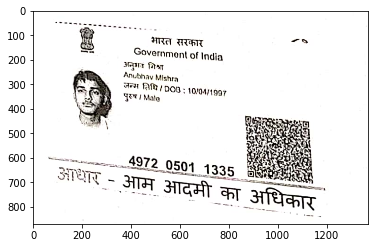

In [5]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [39]:
def deskew(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)

    # threshold the image, setting all foreground pixels to
    # 255 and all background pixels to 0
    thresh = cv2.threshold(gray, 0, 255,
                           cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    # grab the (x, y) coordinates of all pixel values that
    # are greater than zero, then use these coordinates to
    # compute a rotated bounding box that contains all
    # coordinates
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]

    # the `cv2.minAreaRect` function returns values in the
    # range [-90, 0); as the rectangle rotates clockwise the
    # returned angle trends to 0 -- in this special case we
    # need to add 90 degrees to the angle
    if angle < -45:
        angle = -(90 + angle)

    # otherwise, just take the inverse of the angle to make
    # it positive
    else:
        angle = -angle

    # rotate the image to deskew it
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    print(angle)
    # draw the correction angle on the image so we can validate it
    plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
    return rotated

4.044485092163086


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,70,45,67,3,0,hmtsese
8,5,1,2,1,1,1,231,61,27,15,56,I
9,5,1,2,1,1,2,282,62,55,14,0,TR
13,5,1,3,1,1,1,517,45,33,8,61,s
17,5,1,4,1,1,1,89,99,27,4,47,==
21,5,1,5,1,1,1,197,86,109,15,46,Governmont
22,5,1,5,1,1,2,312,86,16,15,92,of
23,5,1,5,1,1,3,335,86,44,15,85,India
27,5,1,6,1,1,1,179,117,40,16,31,e
28,5,1,6,1,1,2,228,114,31,14,13,s


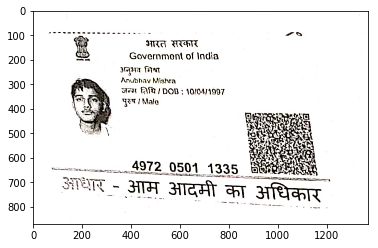

In [44]:
orig = img =cv2.imread(r'test1.png')
img = deskew(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_CUBIC)
#img = cv2.GaussianBlur(img, (5, 5), 0)
img = cv2.bilateralFilter(img,5,75,75)
cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)

#_,img= cv2.threshold(img,130,255,cv2.THRESH_BINARY)

config = ("--oem 3 --psm 11 -l eng -c preserve_interword_spaces=1" )
data1 = pytesseract.image_to_data(img, output_type=pytesseract.Output.DATAFRAME, config=config)
data1.dropna()
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
def kmeans(input_img, k, i_val):
    hist = cv2.calcHist([input_img],[0],None,[256],[0,256])
    img = input_img.ravel()
    img = np.reshape(img, (-1, 1))
    img = img.astype(np.float32)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    compactness,labels,centers = cv2.kmeans(img,k,None,criteria,10,flags)
    centers = np.sort(centers, axis=0)

    return centers[i_val].astype(int), centers, hist
img =cv2.imread(r'img/s1.png')
_, thresh = cv2.threshold(img, kmeans(input_img=img, k=8, i_val=2)[0], 255, cv2.THRESH_BINARY)

data3 = pytesseract.image_to_data(thresh, output_type=pytesseract.Output.DATAFRAME, config='--psm 12')
data3.dropna()


In [ ]:
from PIL import Image
import tempfile
def remove_noise_and_smooth(file_name):
    img = cv2.imread(file_name, 0)
    filtered = cv2.adaptiveThreshold(img.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 41)
    kernel = np.ones((1, 1), np.uint8)
    opening = cv2.morphologyEx(filtered, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    #img = image_smoothening(img)
    or_image = cv2.bitwise_or(img, closing)
    return or_image
def image_smoothening(img):
    ret1, th1 = cv2.threshold(img, cv2.THRESH_BINARY, 255, cv2.THRESH_BINARY)
    ret2, th2 = cv2.threshold(th1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    blur = cv2.GaussianBlur(th2, (5, 5), 0)
    ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return th3
def set_image_dpi(file_path):
    im = Image.open(file_path)
    length_x, width_y = im.size
    factor = min(1, float(1024.0 / length_x))
    size = int(factor * length_x), int(factor * width_y)
    im_resized = im.resize(size, Image.ANTIALIAS)
    temp_file = tempfile.NamedTemporaryFile(delete=False,   suffix='.png')
    temp_filename = temp_file.name
    im_resized.save(temp_filename, dpi=(300, 300))
    return temp_filename
plt.imshow(cv2.cvtColor(remove_noise_and_smooth(set_image_dpi(r'test.jpg')), cv2.COLOR_BGR2RGB))

In [ ]:
data1[data1['text']=="2785"]['top']

In [ ]:
def mask_specific(textArr):
    image1 = cv2.imread(r'5aadhaarcrop.jpg', cv2.IMREAD_COLOR)
    orig1 = image1.copy()
    image1 = cv2.resize(image, (320, 320))
    image_data = pytesseract.image_to_data(image1, output_type=pytesseract.Output.DATAFRAME)
    for word in textArr:
        result = image_data[image_data['text']==word]
        if len(result)>1:
            print("Number of instances of `"+word+"` is not unique")
        elif len(result)==0:
            print("Cannot find `"+word)
        else:
            cv2.rectangle(image1, (result['left'],result['top']),(result['left']+result['width'],result['top']+result['height']),(0,255,0),-1)
            print("Masked "+word)
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))      

mask_specific(["2785","4880"])            
        